In [9]:
pip install xgboost

     |████████████████████████████████| 1.1MB 6.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
df1 = pd.read_csv("/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/training_set_VU_DM.csv")
df2 = pd.read_csv("/Users/harithajayaraman/Documents/2nd-assignment-dmt-2020/test_set_VU_DM.csv")

In [3]:
dfb_1 = df1[df1['booking_bool'] == 1].sample(5000)
dfb_0 = df1[df1['booking_bool'] == 0].sample(5000)
df = pd.concat([dfb_0, dfb_1])

In [4]:
#df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
df.loc[(df['click_bool'] == 1) & (df['booking_bool'] == 1),'target'] = 1
df.loc[(df['click_bool'] == 0) & (df['booking_bool'] == 0),'target'] = 0
df.loc[(df['click_bool'] == 1) & (df['booking_bool'] == 0),'target'] = -1

In [5]:
df['prop_review_score']= df['prop_review_score'].fillna(df['prop_review_score'].median())
#dftest['prop_review_score']= dftest['prop_review_score'].fillna(dftest['prop_review_score'].median())

In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [7]:
# The columns that we will be making predictions with.
X = ['position','srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','prop_log_historical_price','price_usd','srch_destination_id']
# The column that we want to predict.
y = ['target']

In [8]:
data_dmatrix = xgb.DMatrix(data=df[X],label=df[y])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=1)

In [10]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [11]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.580086


In [24]:
#Tuning Learning Rate in XGBoost
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(df[X], df[y])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.625613 using {'learning_rate': 0.1}
-1.092645 (0.000167) with: {'learning_rate': 0.0001}
-1.042994 (0.001513) with: {'learning_rate': 0.001}
-0.777782 (0.010577) with: {'learning_rate': 0.01}
-0.625613 (0.018047) with: {'learning_rate': 0.1}
-0.647659 (0.020015) with: {'learning_rate': 0.2}
-0.673267 (0.026948) with: {'learning_rate': 0.3}


In [25]:
#Tuning Learning Rate and the Number of Trees in XGBoost
# XGBoost on Sample dataset, Tune learning_rate and n_estimators
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(df[X], df[y])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harithajayaraman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.623974 using {'learning_rate': 0.01, 'n_estimators': 500}
-1.092645 (0.000167) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-1.086778 (0.000334) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-1.081001 (0.000490) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-1.075311 (0.000641) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-1.069713 (0.000785) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-1.042994 (0.001513) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.995063 (0.002898) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.953776 (0.004188) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.917964 (0.005473) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.886686 (0.006591) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.777782 (0.010577) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.682660 (0.014784) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.646917 (0.016371) with: {'learning_rate': 0.01, 'n_

In [13]:
#K-fold cross validation using XGBoost
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.506024,0.001403,0.506412,0.003008
1,0.502667,0.005124,0.503460,0.000683
2,0.499406,0.004695,0.500418,0.002870
3,0.495744,0.001653,0.497155,0.002843
4,0.495241,0.001642,0.496889,0.002787


In [15]:
print((cv_results["test-rmse-mean"]).tail(1))
#less rmse compared to before optimization

49    0.460597
Name: test-rmse-mean, dtype: float64


In [16]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [16]:
conda install graphviz

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/harithajayaraman/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    conda-4.8.3                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    fribidi-1.0.5              |       h1de35cc_0          60 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4          

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

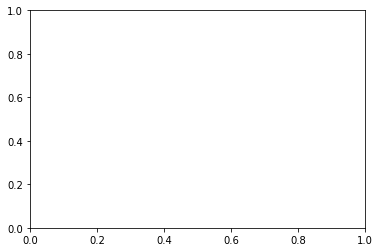

In [17]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

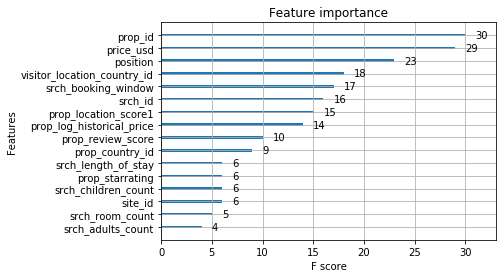

In [18]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()